# <font color = 'indianred'> **Lecture: Linear Regression from scratch using gradient descent**

Linear regression is a widely-used approach for developing regression models. For instance, let's suppose we want to predict the price of a house based on two variables: its area and age. To build a model, we first need a dataset containing various house prices, along with their respective area and age values.

In this dataset, the area and age variables will serve as our features, which we will utilize to estimate the price of a given house. The predicted price will be referred to as the label.

To solve this problem, we can apply a linear regression model. Below, we'll explore the key aspects of linear regression and how to implement it.

## <font color = 'indianred'> **Linear Regression**

The linear regression model involves a set of independent variables (such as area and age for house price prediction) and a dependent variable y (the house price), which is linearly dependent on the independent variables.

Our goal is to generalize y as a weighted sum of the elements in x, while accounting for noise in the observations. Mathematically, this can be expressed as:

$price = weight_{area} * area + weight_{age} * age + b$

Here, b represents the bias, which determines the predicted price value when all the features take the value 0. The weights signify the influence of each feature on our prediction.

<font color = 'indianred'> **Loss Function** </font>
To evaluate the performance of our model, we need to compute the loss. For linear regression, the most common loss function is the sum of squared errors.

<font color = 'indianred'> **Optimization**</font>
We also need an optimization algorithm to minimize our loss function. In this case, we will use the gradient descent algorithm, which iteratively updates the weights and bias to find the optimal values that minimize the loss.

**Let us summarize above points for linear regression:**

**Input**: $\boldsymbol{X}$ (features)

**Output**: $\mathbf{y}$ (label)

**Parameters**: $\mathbf{w}$, b (weights and bias)


The training examples are stored in matrix $\boldsymbol{X}$ row-wise <br><br>
$\boldsymbol{X} =  \begin{bmatrix}
x_1^{(1)}x_2^{(1)}\cdot\cdot\cdot x_n^{(1)} \\ x_1^{(2)}x_2^{(2)}\cdot\cdot\cdot x_n^{(2)}  \\ \cdot \\ \cdot \\ \cdot\ \\ x_1^{(m)}x_2^{(m)}\cdot\cdot\cdot x_n^{(m)} \end{bmatrix}$ , $ \mathbf{w} =\begin{bmatrix}
w_1  w_2  \cdot  \cdot  \cdot  w_n\end{bmatrix}$

We can calculale the predicted values of y for all m observations using follwoing:

\begin{equation}
\hat{\mathbf{y}}  = \boldsymbol{X} \mathbf{w^T} + b
\end{equation}
where $\boldsymbol{X} \mathbf{w^T}$ is matrix multiplication of $\boldsymbol{X}$ and $\mathbf{w^T}$

<b>Cost function</b>
\begin{equation}
\mathcal{L} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2
\end{equation}

Cost Function (Vector Notation):
\begin{equation}
\mathcal{L}  = \frac{1}{m}(\mathbf{\hat{y}}  -\mathbf{y})^T(\mathbf{\hat{y}}  -\mathbf{y})
\end{equation}

Gradient of thr Loss Function with respect to $\mathbf{w}$:
\begin{equation}
\frac{2}{m}(\mathbf{\hat{y}}  -\mathbf{y})^T X
\end{equation}

Gradient of the Loss Function with respect to $b$:
\begin{equation}
\frac{2}{m}\mathbf{1_m}^T(\mathbf{\hat{y}}  -\mathbf{y}))
\end{equation}

here $\mathbf{1_m}$ denote the column vector of all ones and length m

Gradient Descent Algorithm:

The algorithm starts with some “initial guess” for $\mathbf{w}$ and $b$, and that repeatedly changes $\mathbf{w}$ and $b$ to make  $\mathcal{L}$  smaller, until we converge to a value of $\mathbf{w}$ and $b$ minimizes $\mathcal{L}$.

\begin{equation}
\mathbf{w} := \mathbf{w} - \frac{2\alpha} {m}(\mathbf{\hat{y}}  -\mathbf{y})^T X
\end\{equation}


\begin{equation}
b := b - \frac{2\alpha} {m}\mathbf{1_m}^T(\mathbf{\hat{y}}  -\mathbf{y})
\end\{equation}




**We will implement linear regression algorithm from sratch in this notebook using the above formulas.**

In [1]:
# Importing PyTorch Library
import torch

# Importing random library to generate random dataset
import random

In [2]:
# To get deterministic results
torch.manual_seed(456)
random.seed(123)

## <font color = 'indianred'> **Generating a Dataset**

We will generate a dummy dataset having 1000 observations and 2 features.
The observations are sampled from standard normal distribution.

Let us have our true parameter values to be w = [3, -4.5] and b = 5.2.

`y = Xw.T + b + noise`

We will further assume that nose will be normally distributed with mean 0 and standard deviation of 0.01.


In [3]:
def generate_dataset(w, b, num):
    """
    Generates a synthetic dataset of features and labels.

    Args:
        w: weights (a tensor of shape (1, n)) (outputs, inputs)
        b: bias (a scalar)
        num: number of observations

    Returns:
        A tuple (X, y), where:
        X: a tensor of shape (num, n) containing the features (drawn from a standard normal distribution)
        y: a tensor of shape (num, 1) containing the labels (generated from X, w, and b, with added noise)
    """

    # Generate X values from standard normal distribution
    X = torch.randn((num, w.shape[1]))

    # Generate y values: y = Xw + b
    y = torch.mm(X, w.T) + b

    # Add noise to labels
    y += torch.randn_like(y) * 0.01

    # Return the dataset
    return X, y

In [4]:
# Initializing actual weight and bias values
w_true = torch.Tensor([3, -4.5]).view(1,-1)
b_true = 5.2

# Calling the generate_dataset function to create a dummy dataset
features, labels = generate_dataset(w_true, b_true, 1000)

## <font color = 'indianred'> **Visualization of the dataset**

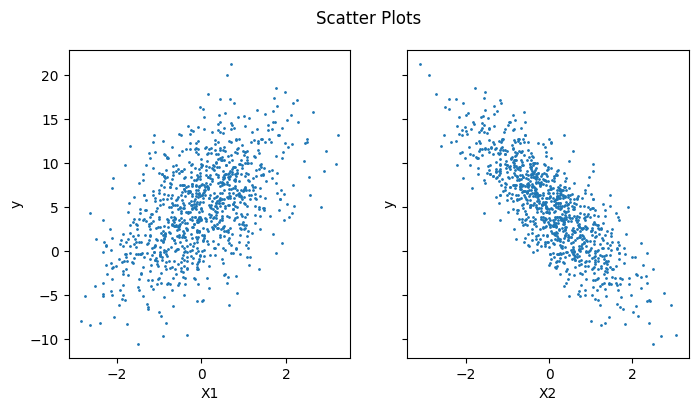

In [5]:
# Importing matplotlib library for visualizing dataset
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
fig.suptitle('Scatter Plots')

# We will create a scatter plot between feature and labels
ax1.scatter(features[:, 0].detach().numpy(), labels.detach().numpy(),s = 1)
ax1.set(xlabel='X1')
ax1.set(ylabel='y')
ax2.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), s = 1)
ax2.set(xlabel='X2')
ax2.set(ylabel='y')
plt.show()

## <font color = 'indianred'> **Reading the dataset**

To train our model, we need to use mini-batches of data and update our model accordingly. To simplify this process, we can define a function that shuffles the dataset and accesses it in mini-batches.

In [6]:
def read_data(batch_size, features, labels):
    """
    Returns an iterator that provides minibatches of features and labels.

    Args:
        batch_size: the number of examples in each minibatch
        features: a tensor of shape (num_examples, num_features) containing the feature data
        labels: a tensor of shape (num_examples, 1) containing the label data

    Yields:
        A tuple (X, y), where:
        X: a tensor of shape (batch_size, num_features) containing the features of the minibatch
        y: a tensor of shape (batch_size, 1) containing the labels of the minibatch
    """

    # Number of examples in the dataset
    num_examples = features.shape[0]

    # Shuffle the indices
    indices = torch.randperm(num_examples)

    # Iterate over minibatches of data
    for i in range(0, num_examples, batch_size):
        batch_indices = indices[i:min(i + batch_size, num_examples)]
        yield features[batch_indices], labels[batch_indices]

Lets create a batch size of 15 and visualize the feature and data values better understanding.

In [7]:
# Specify value for batch_size
batch_size = 15

# Call the function read_data and visualize the size of minibatch
i = 0
for X, y in read_data(batch_size, features, labels):
    print(X.shape)
    print(y.shape)
    print(y, end = '\n\n')

    i += 1
    if i >3:
      break

torch.Size([15, 2])
torch.Size([15, 1])
tensor([[ 2.1182],
        [ 5.4031],
        [ 2.8612],
        [ 5.6596],
        [ 7.1410],
        [-2.2704],
        [ 6.2192],
        [ 0.4906],
        [-1.2130],
        [11.1914],
        [-0.6660],
        [ 5.2282],
        [10.3539],
        [ 1.2101],
        [15.2206]])

torch.Size([15, 2])
torch.Size([15, 1])
tensor([[10.4159],
        [ 9.8259],
        [ 5.0631],
        [ 9.9860],
        [ 1.8482],
        [ 7.5126],
        [12.7210],
        [ 5.1767],
        [ 8.5064],
        [ 2.5382],
        [ 1.5392],
        [ 2.3270],
        [ 6.1898],
        [ 2.4709],
        [13.1709]])

torch.Size([15, 2])
torch.Size([15, 1])
tensor([[ 7.9489],
        [ 6.4202],
        [ 6.0767],
        [ 2.7198],
        [ 2.7638],
        [-0.5899],
        [-3.7132],
        [ 5.9999],
        [10.0422],
        [ 5.1381],
        [-0.2748],
        [-5.7186],
        [ 2.3259],
        [ 2.6479],
        [ 9.5638]])

torch.Size([15, 2])

## <font color = 'indianred'> **Linear Regression Model**

In [15]:
def linear_reg(X, w, b):
    """
    Computes a linear regression model y = Xw + b.

    Args:
        X: a tensor of shape (num_examples, num_features) containing the feature data
        w: a tensor of shape (1, num_features) containing the model weights
        b: a scalar containing the model bias

    Returns:
        A tensor of shape (num_examples, 1) containing the predicted labels
    """
    return torch.mm(X, w.T) + b


## <font color = 'indianred'> **Loss Function**

In [9]:
def mse_loss(ypred, y):
    """
    Computes the mean squared error loss between predicted and actual labels.

    Args:
        ypred: a tensor of shape (num_examples, 1) containing the predicted labels
        y: a tensor of shape (num_examples, 1) containing the actual labels

    Returns:
        A scalar tensor containing the mean squared error loss
    """
    error = ypred - y
    mean_squared_error = torch.mean(error**2)
    return mean_squared_error


## <font color = 'indianred'> **Optimization Algorithm**

In [10]:
# weight update step
def sgd(params, grads, lr):
    """
    Performs a stochastic gradient descent (SGD) update on a set of parameters.

    Args:
        params: a list of tensors representing the parameters to update
        grads: a list of tensors representing the gradients of the parameters
        lr: the learning rate for the update

    Returns:
        None
    """
    for param, grad in zip(params, grads):
        param -= lr * grad


## <font color = 'indianred'> **Model Training**

**Model Training** involves five steps:

- Step 0: Randomly initialize parameters / weights
- Step 1: Compute model's predictions - forward pass
- Step 2: Compute loss
- Step 3: Compute the gradients
- Step 4: Update the parameters
- Step 5: Repeat steps 1 - 4

Model training is repeating this process over and over, for many **epochs**.

An **epoch** is complete when we have used every point once for for computing the loss

We will use min-batch gardient descent. In minibatch gradient descent , we take a small batch of the data. We compute the loss for the batch and update the weights. **If there are $n$ batches, then in one epoch weights get updated $n$ times**.

***Learning rate*** and ***epochs*** are known as hyperparameters. We have to fine tune the value of hy[erparametes using ceoss-validation.


In [11]:
# Step 0: Initialize the model parameters
w = torch.normal(mean=0, std=0.01, size=(1, 2))
b = torch.zeros(1)

# Print the initial parameter values
print('Initial weights:', w)
print('Initial bias:', b)
print(w.shape)

Initial weights: tensor([[-0.0107, -0.0064]])
Initial bias: tensor([0.])
torch.Size([1, 2])


In [16]:
# Set the values for learning rate and number of epochs
lr = 0.005
epochs = 10

# Iterate over the whole dataset
for epoch in range(epochs):

    # Iterate over mini batch
    for X, y in read_data(batch_size, features, labels):

        # step 1 :forward pass - compute predictions
        ypred = linear_reg(X, w, b)

        # step 2: Calculate minibatch loss
        batch_loss = mse_loss(ypred, y)


        # step 3: Compute gradient on loss with respect to weights and bias
        grad_w = 2 *(ypred-y).T.mm(X)/len(y)
        grad_b = 2 *(ypred-y).sum()/len(y)

        # step 4: Update parameters using their gradient using optimization algorithm
        sgd([w, b], [grad_w, grad_b], lr)


    # Calculate and print loss for the complete epoch
    train_l = mse_loss(linear_reg(features, w, b), labels)

    print(f'epoch {epoch + 1}, loss {float(train_l.item()):f}')

epoch 1, loss 15.025251
epoch 2, loss 4.395356
epoch 3, loss 1.294068
epoch 4, loss 0.382050
epoch 5, loss 0.113014
epoch 6, loss 0.033510
epoch 7, loss 0.009993
epoch 8, loss 0.003045
epoch 9, loss 0.000981
epoch 10, loss 0.000368


We can observe that with each epoch, our loss is getting reduced hence our linear regression model is able to classify accurately.

Now since we generated the dataset ourselves we know the actual values for weights and bias, so we can check the error in both of them.

In [ ]:
# Printing error in weights and bias
print(f'Error in estimating w: {w_true.view(-1,1) - w}')
print(f'Error in estimating b: {b_true - b}')
print(f'estimated value of w: {w}')
print(f'estimated value of b: {b}')

Error in estimating w: tensor([[ 4.2961e-03,  7.4931e+00],
        [-7.4957e+00, -6.8731e-03]])
Error in estimating b: tensor([0.0048])
estimated value of w: tensor([[ 2.9957, -4.4931]])
estimated value of b: tensor([5.1952])
